Importing Necessary Libray and uploading the data.

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# Corrected the import statement from google.coba to google.colab
from google.colab import files
# %%
upload = files.upload()

Saving superstore_data.csv to superstore_data.csv


In [ ]:
# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
df = pd.read_csv('superstore_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [ ]:
# Missing values analysis
print("\n" + "=" * 30)
print("MISSING VALUES ANALYSIS")
print("=" * 30)
# The following lines were indented incorrectly
missing_values = df.isnull().sum()
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': (missing_values.values / len(df)) * 100
})
print(missing_df[missing_df['Missing_Count'] > 0])


MISSING VALUES ANALYSIS
   Column  Missing_Count  Missing_Percentage
4  Income             24            1.071429


In [ ]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [ ]:
print(df.isnull().sum()) # Check for missing values on the original df DataFrame

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64


In [ ]:
def preprocess_data(self):
    """
    Comprehensive data preprocessing
    """
    print("\n" + "=" * 50)
    print("DATA PREPROCESSING")
    print("=" * 50)

    self.df_processed = self.df.copy()

    # Step 1: Handle missing values
    print("Step 1: Handling missing values...")
    missing_before = self.df_processed.isnull().sum().sum()

    if missing_before > 0:
        for col in self.df_processed.columns:
            if self.df_processed[col].isnull().sum() > 0:
                if self.df_processed[col].dtype in ['int64', 'float64']:
                    # Fill numerical missing values with the mean
                    self.df_processed[col].fillna(self.df_processed[col].mean(), inplace=True)
                    print(f"Filled missing values in column '{col}' with the mean.")
                # Add logic for handling other data types if needed
                # else:
                #     print(f"Column '{col}' has missing values but is not numerical. Skipping.")
    else:
        print("No missing values found in the dataset.")

    # You can add subsequent preprocessing steps here

    print("Preprocessing complete.")

In [ ]:
def preprocess_data(df):
    """
    Comprehensive data preprocessing
    """
    print("\n" + "=" * 50)
    print("DATA PREPROCESSING")
    print("=" * 50)

    df_processed = df.copy() # Work on a copy to avoid modifying the original DataFrame directly

    # Step 1: Handle missing values
    print("Step 1: Handling missing values...")
    missing_before = df_processed.isnull().sum().sum()

    if missing_before > 0:
        for col in df_processed.columns:
            if df_processed[col].isnull().sum() > 0:
                if df_processed[col].dtype in ['int64', 'float64']:
                    # Fill numeric columns with median (consistent with the last code fragment)
                    median_val = df_processed[col].median()
                    df_processed[col].fillna(median_val, inplace=True)
                    print(f"  - Filled {col} with median: {median_val}")
                else:
                    # Fill categorical columns with mode
                    mode_val = df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown'
                    df_processed[col].fillna(mode_val, inplace=True)
                    print(f"  - Filled {col} with mode: {mode_val}")

    missing_after = df_processed.isnull().sum().sum()
    print(f"✓ Missing values reduced from {missing_before} to {missing_after}")
    print("Preprocessing complete.")

    return df_processed # Return the processed DataFrame

# Example of how to call the function:
# df_cleaned = preprocess_data(df)
# print(df_cleaned.isnull().sum())

In [ ]:
df_processed = df.copy() # Work on a copy to avoid modifying the original DataFrame directly

# Step 1: Handle missing values
print("Step 1: Handling missing values...")
missing_before = df_processed.isnull().sum().sum()

if missing_before > 0:
    for col in df_processed.columns:
        if df_processed[col].isnull().sum() > 0:
            if df_processed[col].dtype in ['int64', 'float64']:
                # Fill numeric columns with median (consistent with the last code fragment)
                median_val = df_processed[col].median()
                df_processed[col].fillna(median_val, inplace=True)
                print(f"  - Filled {col} with median: {median_val}")
            else:
                # Fill categorical columns with mode
                mode_val = df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown'
                df_processed[col].fillna(mode_val, inplace=True)
                print(f"  - Filled {col} with mode: {mode_val}")

missing_after = df_processed.isnull().sum().sum()
print(f"✓ Missing values reduced from {missing_before} to {missing_after}")


# Step 2: Feature Engineering
print("\nStep 2: Feature Engineering...")

# Handle date column
if 'Dt_Customer' in df_processed.columns:
    try:
        df_processed['Dt_Customer'] = pd.to_datetime(df_processed['Dt_Customer'])
        # Use today's date as a reference if no 'Dt_Customer' exists for max calculation edge case
        reference_date = df_processed['Dt_Customer'].max() if not df_processed['Dt_Customer'].empty else datetime.now()
        df_processed['Customer_Days'] = (reference_date - df_processed['Dt_Customer']).dt.days
        df_processed.drop('Dt_Customer', axis=1, inplace=True)
        print("  ✓ Created Customer_Days from Dt_Customer")
    except Exception as e: # Catch potential errors during date conversion
        print(f"  ✗ Could not process Dt_Customer column: {e}")
        # Optionally, drop the column if it cannot be processed
        if 'Dt_Customer' in df_processed.columns:
            df_processed.drop('Dt_Customer', axis=1, inplace=True)
            print("  - Dropped Dt_Customer column due to processing error.")


df_processed = df.copy() # Work on a copy to avoid modifying the original DataFrame directly

# Step 1: Handle missing values
print("Step 1: Handling missing values...")
missing_before = df_processed.isnull().sum().sum()

if missing_before > 0:
    for col in df_processed.columns:
        if df_processed[col].isnull().sum() > 0:
            if df_processed[col].dtype in ['int64', 'float64']:
                # Fill numeric columns with median (consistent with the last code fragment)
                median_val = df_processed[col].median()
                df_processed[col].fillna(median_val, inplace=True)
                print(f"  - Filled {col} with median: {median_val}")
            else:
                # Fill categorical columns with mode
                mode_val = df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown'
                df_processed[col].fillna(mode_val, inplace=True)
                print(f"  - Filled {col} with mode: {mode_val}")

missing_after = df_processed.isnull().sum().sum()
print(f"✓ Missing values reduced from {missing_before} to {missing_after}")


# Step 2: Feature Engineering
print("\nStep 2: Feature Engineering...")

# Handle date column
if 'Dt_Customer' in df_processed.columns:
    try:
        df_processed['Dt_Customer'] = pd.to_datetime(df_processed['Dt_Customer'])
        # Use today's date as a reference if no 'Dt_Customer' exists for max calculation edge case
        reference_date = df_processed['Dt_Customer'].max() if not df_processed['Dt_Customer'].empty else datetime.now()
        df_processed['Customer_Days'] = (reference_date - df_processed['Dt_Customer']).dt.days
        df_processed.drop('Dt_Customer', axis=1, inplace=True)
        print("  ✓ Created Customer_Days from Dt_Customer")
    except Exception as e: # Catch potential errors during date conversion
        print(f"  ✗ Could not process Dt_Customer column: {e}")
        # Optionally, drop the column if it cannot be processed
        if 'Dt_Customer' in df_processed.columns:
            df_processed.drop('Dt_Customer', axis=1, inplace=True)
            print("  - Dropped Dt_Customer column due to processing error.")


print("Preprocessing complete.")

# return df_processed # Return the processed DataFrame

Step 1: Handling missing values...
✓ Missing values reduced from 0 to 0

Step 2: Feature Engineering...
  ✓ Created Customer_Days from Dt_Customer
Step 1: Handling missing values...
✓ Missing values reduced from 0 to 0

Step 2: Feature Engineering...
  ✓ Created Customer_Days from Dt_Customer
Preprocessing complete.


In [ ]:
def preprocess_data(df):
    """
    Comprehensive data preprocessing
    """
    print("\n" + "=" * 50)
    print("DATA PREPROCESSING")
    print("=" * 50)

    df_processed = df.copy() # Work on a copy to avoid modifying the original DataFrame directly

    # Step 1: Handle missing values
    print("Step 1: Handling missing values...")
    missing_before = df_processed.isnull().sum().sum()

    if missing_before > 0:
        for col in df_processed.columns:
            if df_processed[col].isnull().sum() > 0:
                if df_processed[col].dtype in ['int64', 'float64']:
                    # Fill numeric columns with median (consistent with the last code fragment)
                    median_val = df_processed[col].median()
                    df_processed[col].fillna(median_val, inplace=True)
                    print(f"  - Filled {col} with median: {median_val}")
                else:
                    # Fill categorical columns with mode
                    mode_val = df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown'
                    df_processed[col].fillna(mode_val, inplace=True)
                    print(f"  - Filled {col} with mode: {mode_val}")

    missing_after = df_processed.isnull().sum().sum()
    print(f"✓ Missing values reduced from {missing_before} to {missing_after}")


    # Step 2: Feature Engineering
    print("\nStep 2: Feature Engineering...")

    # Handle date column
    if 'Dt_Customer' in df_processed.columns:
        try:
            df_processed['Dt_Customer'] = pd.to_datetime(df_processed['Dt_Customer'])
            # Use today's date as a reference if no 'Dt_Customer' exists for max calculation edge case
            reference_date = df_processed['Dt_Customer'].max() if not df_processed['Dt_Customer'].empty else datetime.now()
            df_processed['Customer_Days'] = (reference_date - df_processed['Dt_Customer']).dt.days
            df_processed.drop('Dt_Customer', axis=1, inplace=True)
            print("  ✓ Created Customer_Days from Dt_Customer")
        except Exception as e: # Catch potential errors during date conversion
            print(f"  ✗ Could not process Dt_Customer column: {e}")
            # Optionally, drop the column if it cannot be processed
            if 'Dt_Customer' in df_processed.columns:
                df_processed.drop('Dt_Customer', axis=1, inplace=True)
                print("  - Dropped Dt_Customer column due to processing error.")

    # Convert birth year to age
    if 'Year_Birth' in df_processed.columns:
        try:
            current_year = datetime.now().year
            df_processed['Age'] = current_year - df_processed['Year_Birth']
            # Handle unrealistic ages
            df_processed['Age'] = df_processed['Age'].clip(lower=18, upper=100)
            df_processed.drop('Year_Birth', axis=1, inplace=True)
            print("  ✓ Created Age from Year_Birth")
        except Exception as e: # Catch potential errors
            print(f"  ✗ Could not process Year_Birth column: {e}")


    print("Preprocessing complete.")

    return df_processed # Return the processed DataFrame

# Example of how to call the function:
# df_cleaned = preprocess_data(df)
# print(df_cleaned.isnull().sum())
# print(df_cleaned[['Customer_Days', 'Age']].head())

In [ ]:
# Create total spending feature
# Use the globally available df_processed variable instead of self.df_processed
spending_cols = [col for col in df_processed.columns if col.startswith('Mnt')]
if spending_cols:
    # Use the globally available df_processed variable instead of self.df_processed
    df_processed['Total_Spending'] = df_processed[spending_cols].sum(axis=1)
    print(f"  ✓ Created Total_Spending from: {spending_cols}")

  ✓ Created Total_Spending from: ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


In [ ]:
# Create total purchases feature
purchase_cols = [col for col in df_processed.columns if 'Purchases' in col and col.startswith('Num')]
if purchase_cols:
    df_processed['Total_Purchases'] = df_processed[purchase_cols].sum(axis=1)
    print(f"  ✓ Created Total_Purchases from: {purchase_cols}")

  ✓ Created Total_Purchases from: ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


In [ ]:
# Create family size feature
if 'Kidhome' in df_processed.columns and 'Teenhome' in df_processed.columns:
    df_processed['Family_Size'] = df_processed['Kidhome'] + df_processed['Teenhome'] + 1
    print("  ✓ Created Family_Size from Kidhome + Teenhome")

  ✓ Created Family_Size from Kidhome + Teenhome


In [ ]:
# Create spending per purchase ratio
# Removed incorrect indentation and used the global df_processed variable
if 'Total_Spending' in df_processed.columns and 'Total_Purchases' in df_processed.columns:
    df_processed['Spending_Per_Purchase'] = df_processed['Total_Spending'] / (df_processed['Total_Purchases'] + 1)
    print("  ✓ Created Spending_Per_Purchase ratio")

  ✓ Created Spending_Per_Purchase ratio


In [ ]:
# Step 3: Encode categorical variables
print("\nStep 3: Encoding categorical variables...")

# Use the globally available df_processed variable instead of self.df_processed
categorical_cols = df_processed.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'ID']

# Initialize a dictionary to store label encoders if needed later for inverse transform
label_encoders = {}

for col in categorical_cols:
    try:
        le = LabelEncoder()
        # Convert column to string type to handle potential mixed types gracefully
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        # Store the encoder for potential future use
        label_encoders[col] = le
        print(f"  ✓ Encoded {col}: {len(le.classes_)} categories")
    except Exception as e:
        print(f"  ✗ Could not encode {col}: {e}")

# Note: If this code was intended to be part of a class method,
# you would need to put it back inside the method definition
# and use `self.df_processed` and `self.label_encoders`.
# Assuming it's meant to be standalone script code based on the error.

print("Encoding complete.")


Step 3: Encoding categorical variables...
  ✓ Encoded Education: 5 categories
  ✓ Encoded Marital_Status: 8 categories
Encoding complete.


In [ ]:
# Step 4: Handle outliers
print("\nStep 4: Handling outliers...")
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['ID', 'Response']]

outlier_count = 0
for col in numeric_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_before = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()


Step 4: Handling outliers...


In [ ]:
# Step 4: Handle outliers
print("\nStep 4: Handling outliers...")
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['ID', 'Response']]

outlier_count = 0
for col in numeric_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_before = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()

    # Cap outliers instead of removing them - Indented to be inside the loop
    df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound) # Changed self.df_processed to df_processed
    outlier_count += outliers_before

# These print statements and return were likely intended to be outside the loop
print(f"  ✓ Capped {outlier_count} outliers across all numeric columns")

# The following lines were also likely part of a function definition
# and are now adapted for the script context or removed if redundant
# print(f"\n✓ Preprocessing complete! Final shape: {df_processed.shape}") # Changed self.df_processed to df_processed
# print(f"✓ Features created: {[col for col in df_processed.columns if col not in df.columns]}") # Changed self.df.columns to df.columns
# return df_processed # This would only be needed if this was a function


Step 4: Handling outliers...
  ✓ Capped 1615 outliers across all numeric columns


In [ ]:
def exploratory_data_analysis(self):
        """
        Comprehensive EDA with visualizations
        """
        print("\n" + "=" * 50)
        print("EXPLORATORY DATA ANALYSIS")
        print("=" * 50)

In [ ]:

        # Create figure with multiple subplots
        fig = plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

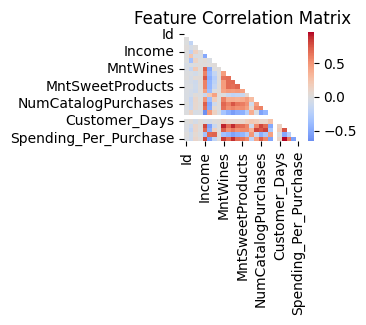

In [ ]:
# Plot 1: Correlation heatmap
plt.subplot(3, 3, 1)
# Use the globally available df_processed variable instead of self.df_processed
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if col not in ['ID', 'Response']]

if len(numerical_cols) > 1:
    # Use the globally available df_processed variable instead of self.df_processed
    corr_matrix = df_processed[numerical_cols].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')

# If this was intended to be part of the exploratory_data_analysis function,
# move it inside the function definition and adjust indentation accordingly.
# For example:
# def exploratory_data_analysis(self):
#     # ... (previous code)
#     # Create figure with multiple subplots
#     fig = plt.figure(figsize=(20, 15))
#
#     # Plot 1: Correlation heatmap
#     plt.subplot(3, 3, 1)
#     numerical_cols = self.df_processed.select_dtypes(include=[np.number]).columns
#     # ... (rest of the heatmap code)

Age column not found for plotting.


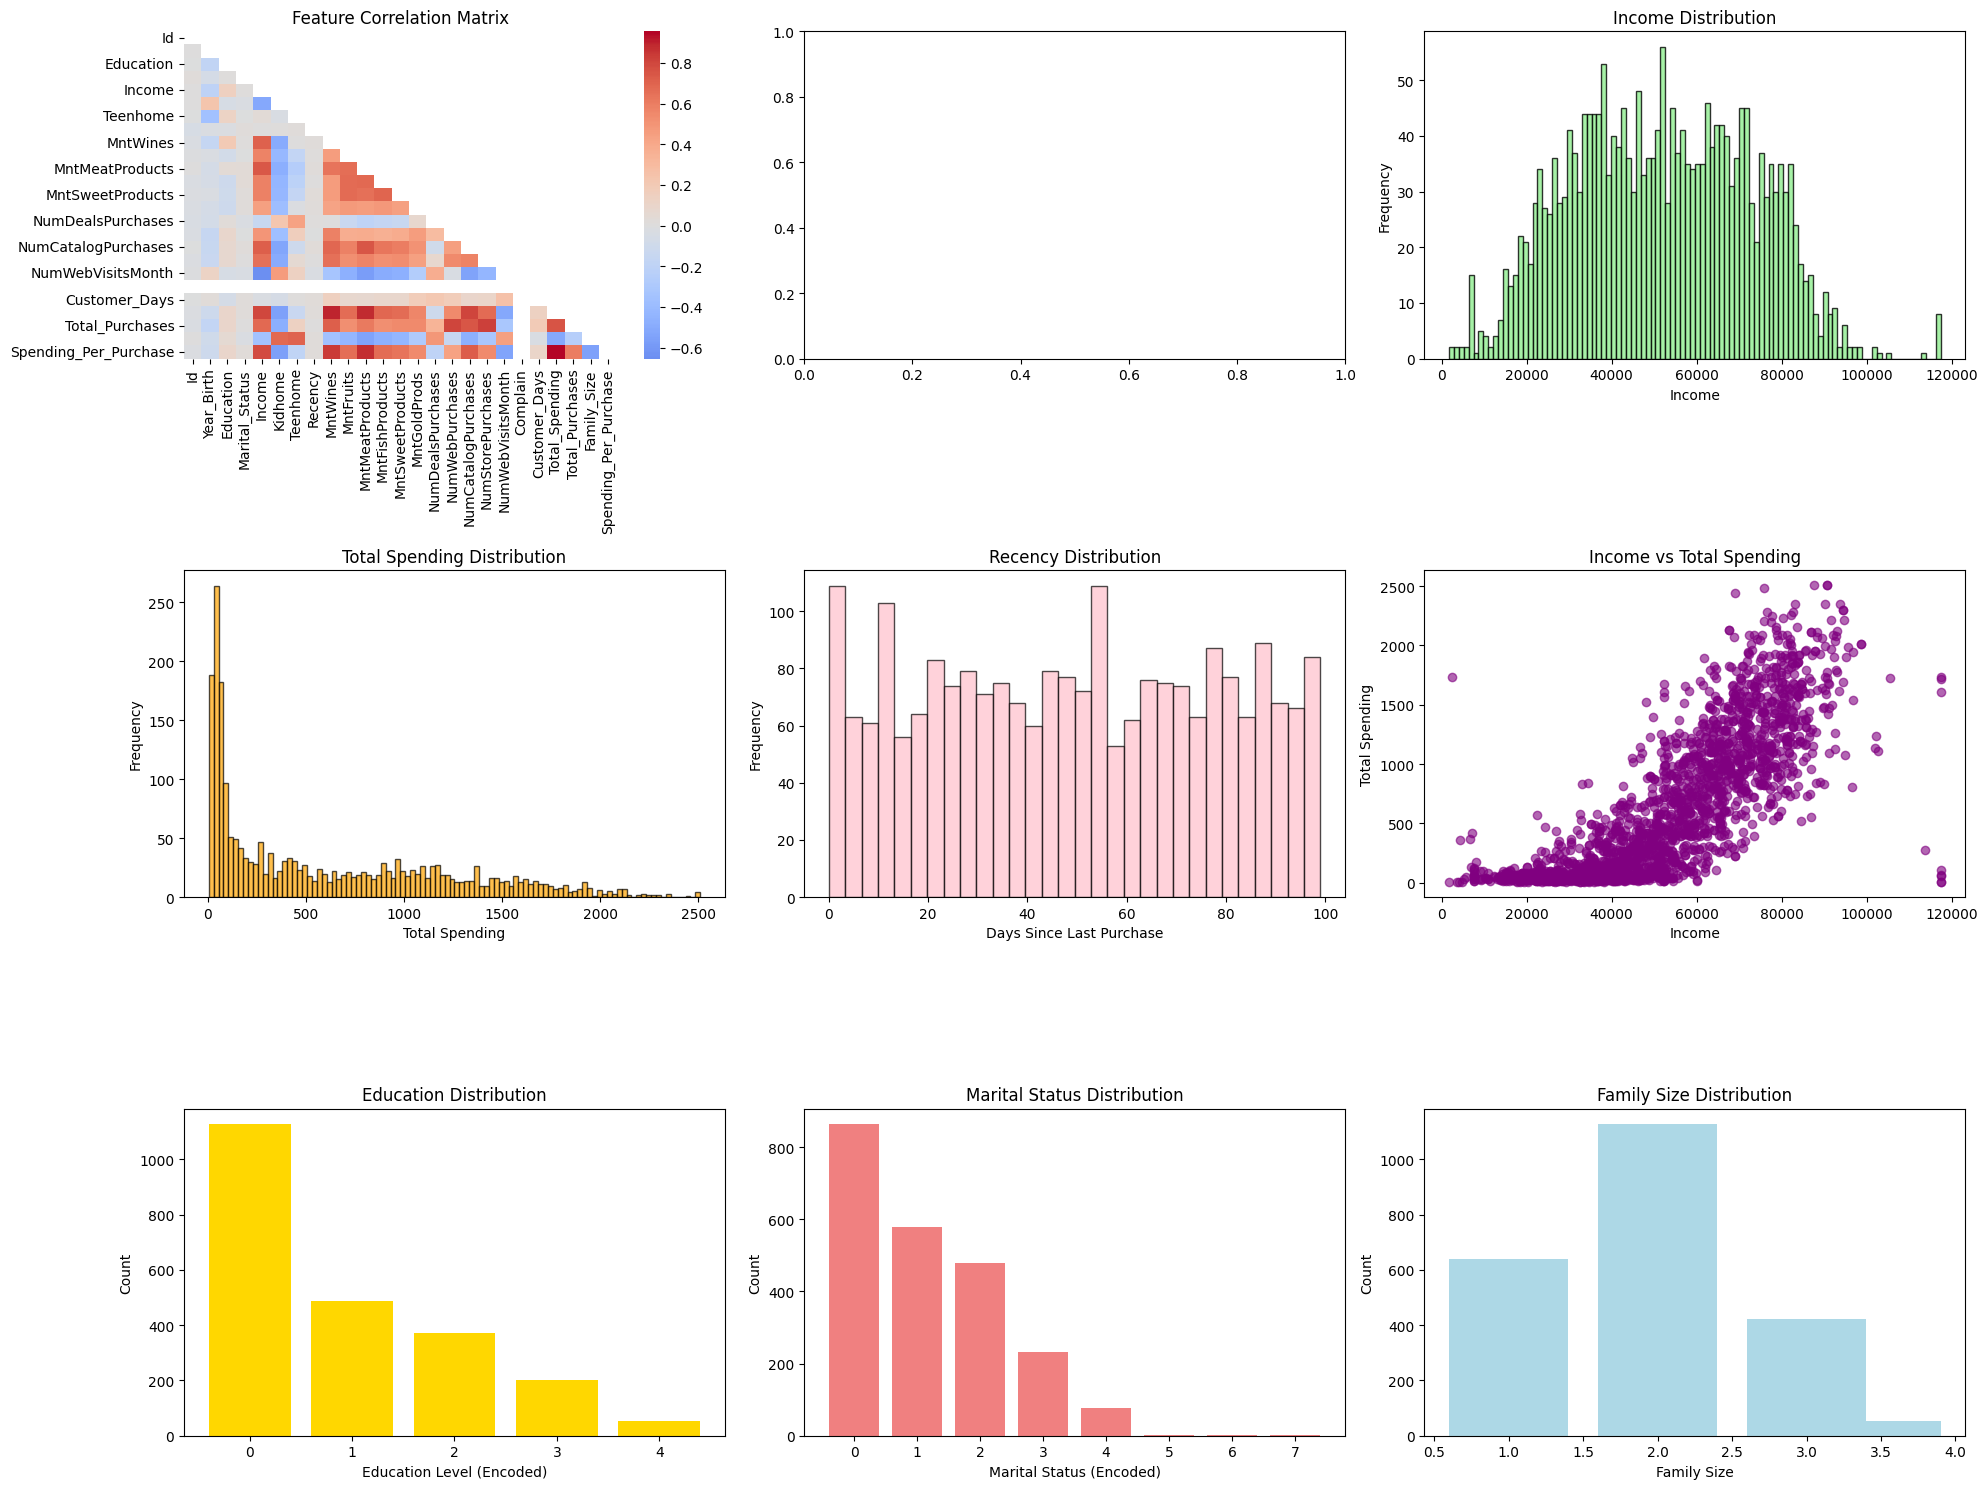

In [ ]:
# Create figure with multiple subplots
# Define the figure only once
fig = plt.figure(figsize=(20, 15))

# Plot 1: Correlation heatmap
plt.subplot(3, 3, 1)
# Use the globally available df_processed variable
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if col not in ['ID', 'Response']]

if len(numerical_cols) > 1:
    # Use the globally available df_processed variable
    corr_matrix = df_processed[numerical_cols].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
else:
    print("Not enough numerical columns to plot correlation heatmap.")


# Plot 2: Age distribution
plt.subplot(3, 3, 2)
# Use the globally available df_processed variable
if 'Age' in df_processed.columns:
    plt.hist(df_processed['Age'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
else:
    print("Age column not found for plotting.")


# Plot 3: Income distribution
plt.subplot(3, 3, 3)
# Use the globally available df_processed variable
if 'Income' in df_processed.columns:
    plt.hist(df_processed['Income'], bins=100, alpha=0.8, color='lightgreen', edgecolor='black') # Increased bins for better detail
    plt.title('Income Distribution')
    plt.xlabel('Income')
    plt.ylabel('Frequency')
else:
    print("Income column not found for plotting.")


# Plot 4: Total Spending distribution
plt.subplot(3, 3, 4)
# Use the globally available df_processed variable
if 'Total_Spending' in df_processed.columns:
    plt.hist(df_processed['Total_Spending'], bins=100, alpha=0.7, color='orange', edgecolor='black') # Increased bins for better detail
    plt.title('Total Spending Distribution')
    plt.xlabel('Total Spending')
    plt.ylabel('Frequency')
else:
    print("Total_Spending column not found for plotting.")

# Plot 5: Recency distribution
plt.subplot(3, 3, 5)
# Use the globally available df_processed variable
if 'Recency' in df_processed.columns:
    plt.hist(df_processed['Recency'], bins=30, alpha=0.7, color='pink', edgecolor='black')
    plt.title('Recency Distribution')
    plt.xlabel('Days Since Last Purchase')
    plt.ylabel('Frequency')
else:
     print("Recency column not found for plotting.")

# Plot 6: Income vs Total Spending
plt.subplot(3, 3, 6)
# Use the globally available df_processed variable
if 'Income' in df_processed.columns and 'Total_Spending' in df_processed.columns:
    plt.scatter(df_processed['Income'], df_processed['Total_Spending'], alpha=0.6, color='purple')
    plt.title('Income vs Total Spending')
    plt.xlabel('Income')
    plt.ylabel('Total Spending')
else:
    print("Income or Total_Spending column not found for plotting Income vs Total Spending.")

# Plot 7: Education Distribution
plt.subplot(3, 3, 7)
# Use the globally available df_processed variable
if 'Education' in df_processed.columns:
    education_counts = df_processed['Education'].value_counts()
    # Use the index from value_counts for x-ticks if needed, otherwise use range
    plt.bar(range(len(education_counts)), education_counts.values, color='gold')
    plt.title('Education Distribution')
    plt.xlabel('Education Level (Encoded)') # Label indicates it's the encoded value
    plt.ylabel('Count')
else:
    print("Education column not found for plotting.")


# Plot 8: Marital Status Distribution
plt.subplot(3, 3, 8)
# Use the globally available df_processed variable
if 'Marital_Status' in df_processed.columns: # Corrected column name
    marital_counts = df_processed['Marital_Status'].value_counts() # Corrected column name and DataFrame variable
    plt.bar(range(len(marital_counts)), marital_counts.values, color='lightcoral')
    plt.title('Marital Status Distribution')
    plt.xlabel('Marital Status (Encoded)')
    plt.ylabel('Count')
else:
    print("Marital_Status column not found for plotting.")

# Plot 9: Family Size distribution - Corrected indentation and variable name
plt.subplot(3, 3, 9)
# Use the globally available df_processed variable
if 'Family_Size' in df_processed.columns:
    family_counts = df_processed['Family_Size'].value_counts().sort_index()
    plt.bar(family_counts.index, family_counts.values, color='lightblue')
    plt.title('Family Size Distribution')
    plt.xlabel('Family Size')
    plt.ylabel('Count')
else:
     print("Family_Size column not found for plotting.")

# Display the plots (this should be done once after all subplots are defined)
plt.tight_layout() # Adjust layout to prevent overlap
plt.show() # Display the figure

In [ ]:
# Print key insights
print("\n" + "=" * 30)
print("KEY INSIGHTS")
print("=" * 30)

# Use the globally available df_processed variable instead of self.df_processed
if 'Age' in df_processed.columns:
    print(f"Age Statistics:")
    print(f"  - Average Age: {df_processed['Age'].mean():.1f} years")
    print(f"  - Age Range: {df_processed['Age'].min():.0f} - {df_processed['Age'].max():.0f} years")

if 'Income' in df_processed.columns:
    print(f"\nIncome Statistics:")
    print(f"  - Average Income: ${df_processed['Income'].mean():,.2f}")
    print(f"  - Median Income: ${df_processed['Income'].median():,.2f}")
    print(f"  - Income Range: ${df_processed['Income'].min():,.2f} - ${df_processed['Income'].max():,.2f}")

if 'Total_Spending' in df_processed.columns:
    print(f"\nSpending Statistics:")
    print(f"  - Average Total Spending: ${df_processed['Total_Spending'].mean():,.2f}")
    print(f"  - Median Total Spending: ${df_processed['Total_Spending'].median():,.2f}")
    print(f"  - Spending Range: ${df_processed['Total_Spending'].min():,.2f} - ${df_processed['Total_Spending'].max():,.2f}")

if 'Recency' in df_processed.columns:
    print(f"\nRecency Statistics:")
    print(f"  - Average Days Since Last Purchase: {df_processed['Recency'].mean():.1f} days")
    print(f"  - Median Days Since Last Purchase: {df_processed['Recency'].median():.1f} days")

if 'Family_Size' in df_processed.columns:
    print(f"\nFamily Size Statistics:")
    print(f"  - Average Family Size: {df_processed['Family_Size'].mean():.1f}")
    print(f"  - Most Common Family Size: {df_processed['Family_Size'].mode()[0]}")

# Corrected indentation for the function definition
def prepare_clustering_data(df):
    """
    Prepare data specifically for clustering
    """
    print("\n" + "=" * 50)
    print("PREPARING DATA FOR CLUSTERING")
    print("=" * 50)

    # Assuming you will work on a copy of the input df here
    df_clustering = df.copy()

    # Placeholder for clustering data preparation logic
    # You would add steps like selecting features, scaling, etc.
    print("Placeholder for clustering data preparation steps...")

    # For demonstration, let's assume we select some columns and scale them
    # This part needs to be filled in based on your clustering requirements
    features_for_clustering = ['Income', 'Total_Spending', 'Age', 'Customer_Days', 'Recency', 'Family_Size',
                               'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                               'NumStorePurchases', 'NumWebVisitsMonth', 'Spending_Per_Purchase']
    # Filter for columns that actually exist in df_clustering
    features_to_scale = [col for col in features_for_clustering if col in df_clustering.columns]

    if features_to_scale:
        scaler = StandardScaler()
        # Scale the selected numerical features
        df_clustering[features_to_scale] = scaler.fit_transform(df_clustering[features_to_scale])
        print(f"  ✓ Scaled features: {features_to_scale}")
    else:
        print("  ✗ No suitable numerical features found for scaling for clustering.")


    print("Clustering data preparation complete.")
    return df_clustering # Return the prepared data


KEY INSIGHTS

Income Statistics:
  - Average Income: $51,875.15
  - Median Income: $51,741.50
  - Income Range: $1,730.00 - $117,416.25

Spending Statistics:
  - Average Total Spending: $605.78
  - Median Total Spending: $396.00
  - Spending Range: $5.00 - $2,510.62

Recency Statistics:
  - Average Days Since Last Purchase: 49.1 days
  - Median Days Since Last Purchase: 49.0 days

Family Size Statistics:
  - Average Family Size: 1.9
  - Most Common Family Size: 2.0


In [ ]:
# Start with processed data
# Use the globally available df_processed variable
clustering_data = df_processed.copy()

# Remove ID and target columns
cols_to_drop = ['ID', 'Response']
existing_cols_to_drop = [col for col in cols_to_drop if col in clustering_data.columns]
if existing_cols_to_drop:
    clustering_data = clustering_data.drop(existing_cols_to_drop, axis=1)
    print(f"✓ Dropped columns: {existing_cols_to_drop}")

✓ Dropped columns: ['Response']


In [ ]:
# Ensure all columns are numeric
print("✓ Converting all columns to numeric...")
for col in clustering_data.columns:
    if clustering_data[col].dtype == 'object':
        try:
            clustering_data[col] = pd.to_numeric(clustering_data[col], errors='coerce')
            print(f"  - Converted {col} to numeric")
        except:
            print(f"  - Could not convert {col} to numeric")

✓ Converting all columns to numeric...


In [ ]:
# Handle any remaining NaN values
nan_count_before = clustering_data.isnull().sum().sum()
if nan_count_before > 0:
    clustering_data = clustering_data.fillna(clustering_data.median())
    print(f"✓ Filled {nan_count_before} NaN values with median")

In [ ]:
# Ensure the StandardScaler is imported if not already
from sklearn.preprocessing import StandardScaler

# Start with the current clustering_data DataFrame
# The previous cells modified the global clustering_data variable
print("✓ Scaling features...")

# Initialize the scaler (assuming you want a new scaler for this step)
scaler = StandardScaler()

# Fit and transform the clustering_data
# Use the global clustering_data variable and create a new variable for scaled data
feature_names = clustering_data.columns
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Convert the scaled data back to a DataFrame to keep column names
# This is optional but often useful for clarity
clustering_data_scaled = pd.DataFrame(clustering_data_scaled, columns=feature_names)

print(f"✓ Clustering data scaled!")
print(f"  - Shape: {clustering_data_scaled.shape}")
print(f"  - Features: {list(clustering_data_scaled.columns)}")

# Note: The original code had a 'self.clustering_data_scaled' which suggests
# it was meant for a class. If you are working with a class, you would
# need to put this code inside the appropriate method and use 'self'.
# This corrected code assumes you are working in a script-like fashion
# where the 'clustering_data' variable is available globally from previous cells.

✓ Scaling features...
✓ Clustering data scaled!
  - Shape: (2240, 25)
  - Features: ['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Customer_Days', 'Total_Spending', 'Total_Purchases', 'Family_Size', 'Spending_Per_Purchase']


In [ ]:
# Show scaling statistics
# Removed the incorrect indentation
print(f"  - Scaled data mean: {clustering_data_scaled.mean().mean():.4f}") # Changed self.clustering_data_scaled to clustering_data_scaled as per global variable
print(f"  - Scaled data std: {clustering_data_scaled.std().mean():.4f}") # Changed self.clustering_data_scaled to clustering_data_scaled as per global variable

# Removed the 'return' statement as this code is not within a function definition
# return self.clustering_data_scaled

def determine_optimal_clusters(data, max_clusters=10): # Removed 'self' as it's not a method here
    """
    Determine optimal number of clusters using multiple methods
    """
    print("\n" + "=" * 50)
    print("DETERMINING OPTIMAL NUMBER OF CLUSTERS")
    print("=" * 50)

  - Scaled data mean: -0.0000
  - Scaled data std: 0.9602


In [ ]:
# Show scaling statistics
print(f"  - Scaled data mean: {clustering_data_scaled.mean().mean():.4f}")
print(f"  - Scaled data std: {clustering_data_scaled.std().mean():.4f}")

def determine_optimal_clusters(data, max_clusters=10):
    """
    Determine optimal number of clusters using multiple methods
    """
    print("\n" + "=" * 50)
    print("DETERMINING OPTIMAL NUMBER OF CLUSTERS")
    print("=" * 50)

    # Initialize lists to store scores
    inertias = []
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []

    K_range = range(2, max_clusters + 1)

    print("Testing different numbers of clusters...")
    for k in K_range:
        print(f"  Testing k={k}...", end="")

        # Indent these lines to be inside the for loop
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

        # Check if k > 1 for silhouette and other scores
        if k > 1:
            # Indent these lines inside the if block
            silhouette_scores.append(silhouette_score(data, kmeans.labels_))
            calinski_scores.append(calinski_harabasz_score(data, kmeans.labels_))
            davies_bouldin_scores.append(davies_bouldin_score(data, kmeans.labels_))
        print(" Done.")

    # Add plotting/output logic here, outside the for loop but inside the function

    # Plotting the elbow method
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, inertias, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.xticks(K_range)
    plt.grid(True)
    plt.show()

    # Plotting Silhouette Scores
    if silhouette_scores: # Only plot if scores were calculated (k > 1)
        plt.figure(figsize=(10, 6))
        # Use K_range starting from 2 for plotting scores
        plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
        plt.title('Silhouette Scores for Different K')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Silhouette Score')
        plt.xticks(range(2, max_clusters + 1))
        plt.grid(True)
        plt.show()

    # Plotting Calinski-Harabasz Scores
    if calinski_scores:
        plt.figure(figsize=(10, 6))
        plt.plot(range(2, max_clusters + 1), calinski_scores, marker='o')
        plt.title('Calinski-Harabasz Scores for Different K')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Calinski-Harabasz Score')
        plt.xticks(range(2, max_clusters + 1))
        plt.grid(True)
        plt.show()

    # Plotting Davies-Bouldin Scores
    if davies_bouldin_scores:
        plt.figure(figsize=(10, 6))
        plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
        plt.title('Davies-Bouldin Scores for Different K')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Davies-Bouldin Score')
        plt.xticks(range(2, max_clusters + 1))
        plt.grid(True)
        # Lower Davies-Bouldin score indicates better clustering
        plt.gca().invert_yaxis() # Invert y-axis for easier interpretation
        plt.show()


    # Optionally, return the results or the data
    # return K_range, inertias, silhouette_scores, calinski_scores, davies_bouldin_scores

# Example of how to call the function (assuming clustering_data_scaled is available)
# determine_optimal_clusters(clustering_data_scaled)

  - Scaled data mean: -0.0000
  - Scaled data std: 0.9602



DETERMINING OPTIMAL NUMBER OF CLUSTERS
Testing different numbers of clusters...
  Testing k=1... Inertia: 19953.769
  Testing k=2... Silhouette: 0.590
  Testing k=3... Silhouette: 0.757
  Testing k=4... Silhouette: 0.792
  Testing k=5... Silhouette: 0.689
  Testing k=6... Silhouette: 0.551
  Testing k=7... Silhouette: 0.430
  Testing k=8... Silhouette: 0.337
  Testing k=9... Silhouette: 0.350
  Testing k=10... Silhouette: 0.362

OPTIMAL CLUSTER RECOMMENDATIONS
Optimal k (Silhouette Score): 4 (Score: 0.792)
Optimal k (Calinski-Harabasz): 4 (Score: 3386.415)
Optimal k (Davies-Bouldin): 4 (Score: 0.291)
Optimal k (Elbow Method): 4

🎯 RECOMMENDED NUMBER OF CLUSTERS: 4
   (Most frequently recommended across methods)


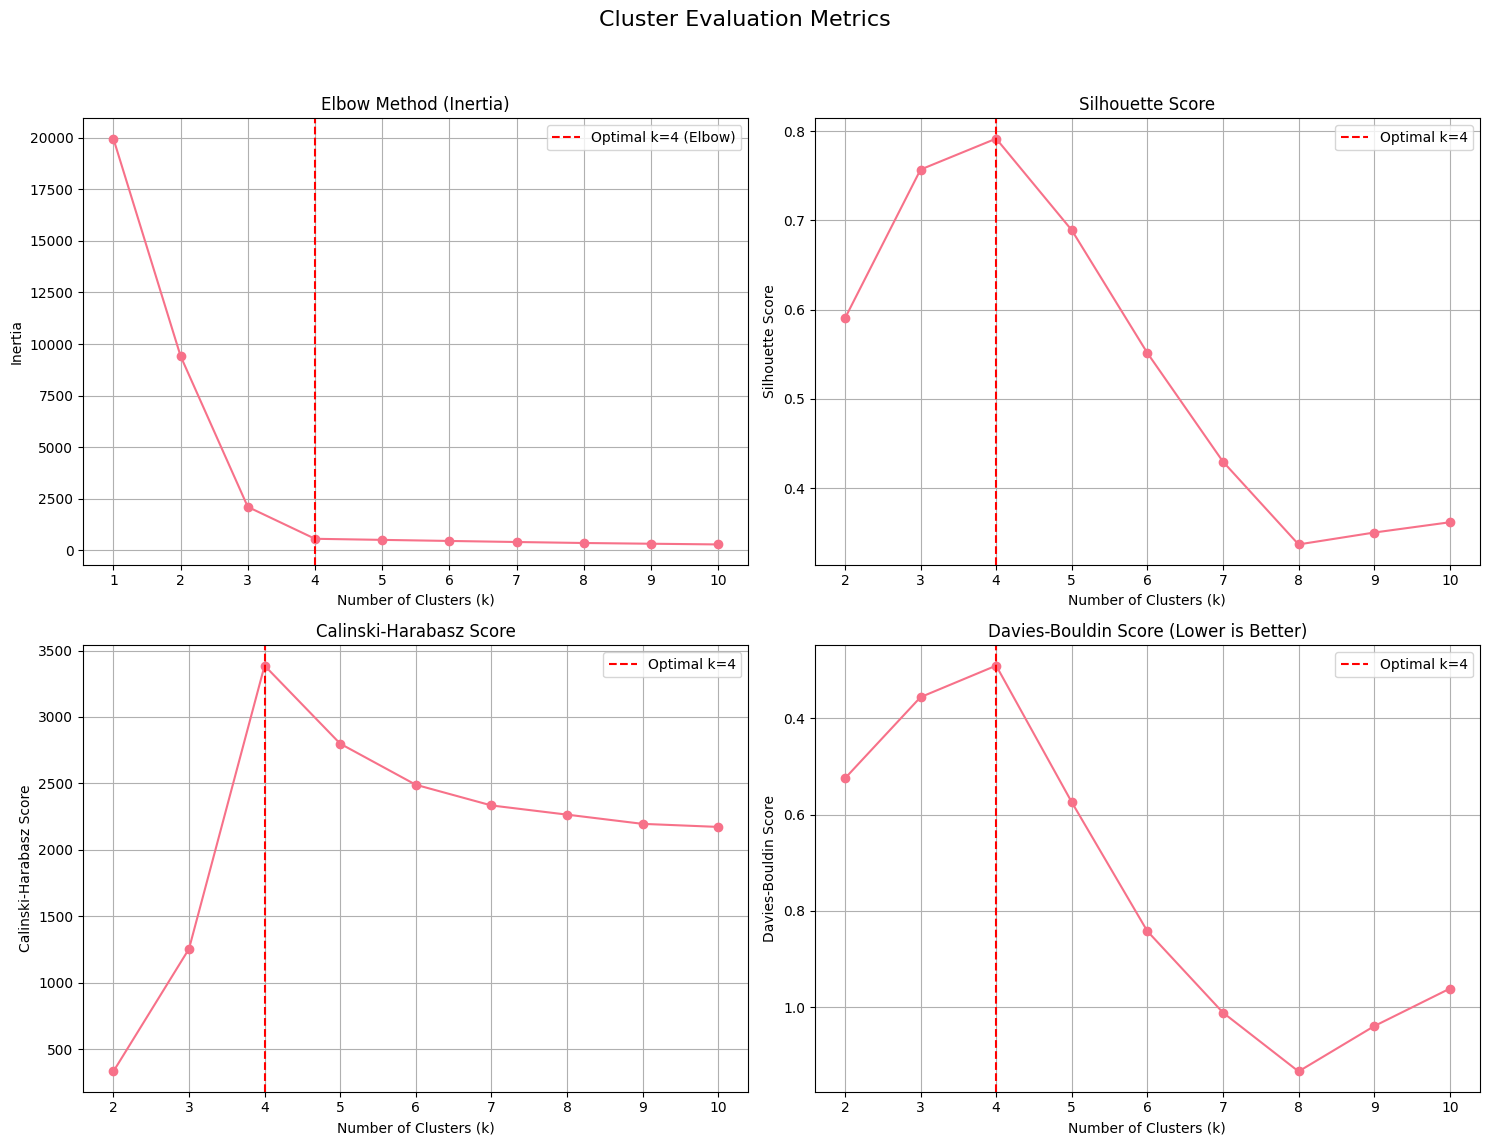


Optimal number of clusters analysis complete.
Consider the 'elbow' in Inertia, the peak in Silhouette/Calinski-Harabasz, and the minimum in Davies-Bouldin.

Function returned recommended k: 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


def determine_optimal_clusters(data, max_clusters=10):
    """
    Determine the optimal number of clusters using Elbow, Silhouette,
    Calinski-Harabasz, and Davies-Bouldin scores.
    """
    print("\n" + "=" * 50)
    print("DETERMINING OPTIMAL NUMBER OF CLUSTERS")
    print("=" * 50)

    inertias = []
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []

    K_range_metrics = range(2, max_clusters + 1)  # for metrics requiring k > 1
    K_range_inertia = range(1, max_clusters + 1)  # for inertia (k ≥ 1)

    print("Testing different numbers of clusters...")

    # Inertia for k=1
    kmeans_k1 = KMeans(n_clusters=1, random_state=42, n_init=10)
    kmeans_k1.fit(data)
    inertias.append(kmeans_k1.inertia_)
    print(f"  Testing k=1... Inertia: {kmeans_k1.inertia_:.3f}")

    # Loop for k=2 up to max_clusters
    for k in K_range_metrics:
        print(f"  Testing k={k}...", end="")

        # Fit K-means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)

        # Calculate metrics for k > 1
        inertia = kmeans.inertia_
        silhouette = silhouette_score(data, labels)
        calinski = calinski_harabasz_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)

        # Store results
        inertias.append(inertia)  # Inertia for k >= 2
        silhouette_scores.append(silhouette)
        calinski_scores.append(calinski)
        davies_bouldin_scores.append(davies_bouldin)

        print(f" Silhouette: {silhouette:.3f}")

    # Find optimal k based on different metrics
    # The indices for silhouette, calinski, and davies_bouldin scores
    # correspond to K_range_metrics (starting from k=2).
    # We need to adjust the index when printing the score.
    optimal_k_silhouette = K_range_metrics[np.argmax(silhouette_scores)]
    optimal_k_calinski = K_range_metrics[np.argmax(calinski_scores)]
    optimal_k_davies = K_range_metrics[np.argmin(davies_bouldin_scores)]

    # Calculate elbow point - use the full inertia list which includes k=1
    # This calculation method is an approximation
    diffs = np.diff(inertias) # Difference between consecutive inertias
    diffs2 = np.diff(diffs)   # Second difference
    # Find the index of the maximum second difference.
    # This index corresponds to where the rate of change of inertia changes the most rapidly.
    # The index is relative to the 'diffs2' array, which starts from k=3.
    # So, add 2 to get the corresponding k value (since diffs is length max_clusters, diffs2 is length max_clusters-1, and indices are 0-based)
    # Example: k=1, 2, 3, 4...
    # inertias: i1, i2, i3, i4...
    # diffs:   i2-i1, i3-i2, i4-i3...  (index 0 is k=2, index 1 is k=3, ...)
    # diffs2: (i3-i2)-(i2-i1), (i4-i3)-(i3-i2)... (index 0 is k=3, index 1 is k=4, ...)
    # So, index 'j' in diffs2 corresponds to k = j + 3. The elbow point is approximately at k where diffs2 is max.
    # Let's find the index in K_range_inertia (1 to max_clusters) that corresponds to the max diffs2.
    # max_diffs2_idx is the index in diffs2. The corresponding k is K_range_inertia[max_diffs2_idx + 2].
    max_diffs2_idx = np.argmax(diffs2)
    optimal_k_elbow = K_range_inertia[max_diffs2_idx + 2] # Add 2 to the index to get the k value

    print("\n" + "=" * 30)
    print("OPTIMAL CLUSTER RECOMMENDATIONS")
    print("=" * 30)
    # Adjust index when printing scores because silhouette_scores, calinski_scores,
    # and davies_bouldin_scores lists start from k=2 (index 0 corresponds to k=2).
    print(f"Optimal k (Silhouette Score): {optimal_k_silhouette} (Score: {silhouette_scores[optimal_k_silhouette-2]:.3f})")
    print(f"Optimal k (Calinski-Harabasz): {optimal_k_calinski} (Score: {calinski_scores[optimal_k_calinski-2]:.3f})")
    print(f"Optimal k (Davies-Bouldin): {optimal_k_davies} (Score: {davies_bouldin_scores[optimal_k_davies-2]:.3f})")
    print(f"Optimal k (Elbow Method): {optimal_k_elbow}")

    # Choose the most common recommendation - ADDED BACK WITH CORRECT INDENTATION
    recommendations = [optimal_k_silhouette, optimal_k_calinski, optimal_k_davies, optimal_k_elbow]
    final_k = max(set(recommendations), key=recommendations.count)

    print(f"\n🎯 RECOMMENDED NUMBER OF CLUSTERS: {final_k}")
    print(f"   (Most frequently recommended across methods)")


    # Create plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Cluster Evaluation Metrics', fontsize=16)

    # Elbow plot
    axes[0, 0].plot(K_range_inertia, inertias, marker='o')
    axes[0, 0].axvline(optimal_k_elbow, color='r', linestyle='--', label=f'Optimal k={optimal_k_elbow} (Elbow)')
    axes[0, 0].set_title('Elbow Method (Inertia)')
    axes[0, 0].set_xlabel('Number of Clusters (k)')
    axes[0, 0].set_ylabel('Inertia')
    axes[0, 0].set_xticks(K_range_inertia)
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Silhouette plot
    if silhouette_scores:
        axes[0, 1].plot(K_range_metrics, silhouette_scores, marker='o')
        axes[0, 1].axvline(optimal_k_silhouette, color='r', linestyle='--', label=f'Optimal k={optimal_k_silhouette}')
        axes[0, 1].set_title('Silhouette Score')
        axes[0, 1].set_xlabel('Number of Clusters (k)')
        axes[0, 1].set_ylabel('Silhouette Score')
        axes[0, 1].set_xticks(K_range_metrics)
        axes[0, 1].legend()
        axes[0, 1].grid(True)
    else:
        axes[0, 1].text(0.5, 0.5, 'No Silhouette Scores (K > 1 required)',
                       horizontalalignment='center', verticalalignment='center', transform=axes[0, 1].transAxes)

    # Calinski-Harabasz plot
    if calinski_scores:
        axes[1, 0].plot(K_range_metrics, calinski_scores, marker='o')
        axes[1, 0].axvline(optimal_k_calinski, color='r', linestyle='--', label=f'Optimal k={optimal_k_calinski}')
        axes[1, 0].set_title('Calinski-Harabasz Score')
        axes[1, 0].set_xlabel('Number of Clusters (k)')
        axes[1, 0].set_ylabel('Calinski-Harabasz Score')
        axes[1, 0].set_xticks(K_range_metrics)
        axes[1, 0].legend()
        axes[1, 0].grid(True)
    else:
        axes[1, 0].text(0.5, 0.5, 'No Calinski-Harabasz Scores (K > 1 required)',
                       horizontalalignment='center', verticalalignment='center', transform=axes[1, 0].transAxes)

    # Davies-Bouldin plot
    if davies_bouldin_scores:
        axes[1, 1].plot(K_range_metrics, davies_bouldin_scores, marker='o')
        axes[1, 1].axvline(optimal_k_davies, color='r', linestyle='--', label=f'Optimal k={optimal_k_davies}')
        axes[1, 1].set_title('Davies-Bouldin Score (Lower is Better)')
        axes[1, 1].set_xlabel('Number of Clusters (k)')
        axes[1, 1].set_ylabel('Davies-Bouldin Score')
        axes[1, 1].set_xticks(K_range_metrics)
        axes[1, 1].invert_yaxis()  # Lower is better
        axes[1, 1].legend()
        axes[1, 1].grid(True)
    else:
        axes[1, 1].text(0.5, 0.5, 'No Davies-Bouldin Scores (K > 1 required)',
                       horizontalalignment='center', verticalalignment='center', transform=axes[1, 1].transAxes)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    print("\nOptimal number of clusters analysis complete.")
    print("Consider the 'elbow' in Inertia, the peak in Silhouette/Calinski-Harabasz, and the minimum in Davies-Bouldin.")

    # Return the final recommended k - ADDED BACK WITH CORRECT INDENTATION
    return final_k

# -------------------------
# ✅ Test Example
# -------------------------
if __name__ == "__main__":
    # Create example data
    X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

    # Call the function
    recommended_k = determine_optimal_clusters(X)
    print(f"\nFunction returned recommended k: {recommended_k}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
from sklearn.datasets import make_blobs

# Keep the test data generation outside the function for testing purposes
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
clustering_data_scaled = pd.DataFrame(X)
final_k = 4

# Define the perform_clustering function
def perform_clustering(data, n_clusters):
    """
    Perform clustering using KMeans, Agglomerative Clustering, Gaussian Mixture Model, and DBSCAN.
    Evaluates clusters with Silhouette, Calinski-Harabasz, and Davies-Bouldin metrics.
    """
    print(f"\n{'='*50}\nPERFORMING CLUSTERING WITH {n_clusters} CLUSTERS\n{'='*50}")

    # Moved this block inside the function definition
    # Define clustering algorithms - DBSCAN eps and min_samples might need tuning for real data
    clustering_algorithms = {
        'K-Means': KMeans(n_clusters=n_clusters, random_state=42, n_init=10),
        'Hierarchical': AgglomerativeClustering(n_clusters=n_clusters, linkage='ward'),
        # GaussianMixture takes n_components, not n_clusters
        'Gaussian Mixture': GaussianMixture(n_components=n_clusters, random_state=42),
        # DBSCAN parameters (eps, min_samples) determine the number of clusters
        # n_clusters argument is ignored for DBSCAN
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5) # Default values, tune for actual data
    }

    results = {}

    for name, algorithm in clustering_algorithms.items(): # Changed 'model' to 'algorithm' for clarity
        print(f"\nRunning {name}...")

        try:
            # Get cluster labels
            if name == 'Gaussian Mixture':
                # Gaussian Mixture requires fitting first, then predicting
                algorithm.fit(data)
                labels = algorithm.predict(data)
            else:
                 # Standard fit_predict for other models
                labels = algorithm.fit_predict(data)

            # Calculate number of clusters found for this model
            unique_labels = set(labels)
            # Subtract 1 if -1 (noise) is present in DBSCAN
            # Check if it's DBSCAN AND -1 is in labels
            n_clusters_found = len(unique_labels) - (1 if -1 in unique_labels and name == 'DBSCAN' else 0)

            # Initialize metrics - use np.nan if not calculated
            silhouette = np.nan
            calinski = np.nan
            davies_bouldin = np.nan
            error = None # Initialize error status

            # Calculate metrics for algorithms where it makes sense (more than 1 cluster, not all noise)
            # and for non-DBSCAN, ensure num clusters is reasonable (<= num samples)
            if name == 'DBSCAN':
                 # Metrics for DBSCAN require at least 2 *found* clusters and points not labeled as noise (-1)
                if n_clusters_found > 1:
                    mask = labels != -1 # Mask to exclude noise points
                    filtered_data = data[mask]
                    filtered_labels = labels[mask]

                    # Ensure there's more than one cluster label left after filtering and enough data points
                    if len(set(filtered_labels)) > 1 and len(filtered_data) >= 2: # Metrics require at least 2 samples
                        silhouette = silhouette_score(filtered_data, filtered_labels)
                        calinski = calinski_harabasz_score(filtered_data, filtered_labels)
                        davies_bouldin = davies_bouldin_score(filtered_data, filtered_labels)
                    else:
                         print("  - Skipping metrics for DBSCAN: Not enough data or clusters after removing noise.")
                else:
                     print("  - Skipping metrics for DBSCAN: Found 1 or 0 clusters (excluding noise).")

            # Other clustering algorithms (fixed n_clusters provided)
            else:
                 # Metrics require at least 2 unique labels found and more than 1 data point
                 if len(set(labels)) > 1 and len(data) >= 2:
                    silhouette = silhouette_score(data, labels)
                    calinski = calinski_harabasz_score(data, labels)
                    davies_bouldin = davies_bouldin_score(data, labels)
                 else:
                    print(f"  - Skipping metrics for {name}: Only 1 cluster or not enough data points.")


            # Store results - This block was causing the IndentationError
            results[name] = {
                'model': algorithm, # Store the fitted model object if needed later
                'labels': labels,
                'n_clusters_found': n_clusters_found, # Store number of clusters found
                'silhouette_score': silhouette,
                'calinski_harabasz_score': calinski,
                'davies_bouldin_score': davies_bouldin,
                'unique_labels_found': sorted(list(unique_labels)) # Store the actual unique labels found
            }

            # Print cluster distribution
            # Only print if clustering was successful (labels exist)
            if labels is not None:
                cluster_counts = pd.Series(labels).value_counts().sort_index()
                print(f"  ✓ Found {n_clusters_found} clusters. Distribution: {dict(cluster_counts)}")

        except Exception as e:
            print(f"❌ Error in {name}: {e}")
            results[name] = {
                'model': None,
                'labels': None,
                'n_clusters_found': 0,
                'silhouette_score': np.nan,
                'calinski_harabasz_score': np.nan,
                'davies_bouldin_score': np.nan,
                'error': str(e)
            }


    # Print summary of evaluation metrics
    print("\n" + "="*30 + "\nCLUSTERING EVALUATION METRICS SUMMARY\n" + "="*30)
    for name, res in results.items():
        print(f"\n{name}:")
        if "error" in res: # Check for the 'error' key
            print(f"  Error: {res['error']}")
        else:
            # Check if metrics were calculated before printing
            print(f"  Clusters Found         : {res['n_clusters_found']}")
            print(f"  Unique Labels Found    : {res['unique_labels_found']}") # Display actual labels

            if not np.isnan(res['silhouette_score']): # Check if silhouette is NOT NaN
                 print(f"  Silhouette Score       : {res['silhouette_score']:.4f}")
            else:
                 print("  Silhouette Score       : N/A (Insufficient clusters/data)")

            if not np.isnan(res['calinski_harabasz_score']): # Check if calinski is NOT NaN
                print(f"  Calinski-Harabasz Score: {res['calinski_harabasz_score']:.4f}")
            else:
                 print("  Calinski-Harabasz Score: N/A (Insufficient clusters/data)")

            if not np.isnan(res['davies_bouldin_score']): # Check if davies_bouldin is NOT NaN
                print(f"  Davies-Bouldin Score    : {res['davies_bouldin_score']:.4f}")
            else:
                 print("  Davies-Bouldin Score    : N/A (Insufficient clusters/data)")

            if -1 in res['unique_labels_found']:
                print("  (Note: -1 label indicates noise points by DBSCAN)")


    return results # Return the dictionary of results

# Now, call the function with the data and the chosen number of clusters
# The global variable clustering_data_scaled will be used.
# Make sure clustering_data_scaled is a numpy array or pandas DataFrame/Series of numeric type.
# Based on previous cells, clustering_data_scaled is a DataFrame of scaled numeric data.
clustering_results = perform_clustering(clustering_data_scaled.values, final_k)


PERFORMING CLUSTERING WITH 4 CLUSTERS

Running K-Means...
  ✓ Found 4 clusters. Distribution: {0: np.int64(76), 1: np.int64(75), 2: np.int64(75), 3: np.int64(74)}

Running Hierarchical...
  ✓ Found 4 clusters. Distribution: {0: np.int64(76), 1: np.int64(75), 2: np.int64(75), 3: np.int64(74)}

Running Gaussian Mixture...
  ✓ Found 4 clusters. Distribution: {0: np.int64(76), 1: np.int64(75), 2: np.int64(75), 3: np.int64(74)}

Running DBSCAN...
  ✓ Found 5 clusters. Distribution: {-1: np.int64(85), 0: np.int64(48), 1: np.int64(54), 2: np.int64(54), 3: np.int64(54), 4: np.int64(5)}

CLUSTERING EVALUATION METRICS SUMMARY

K-Means:
  Clusters Found         : 4
  Unique Labels Found    : [np.int32(0), np.int32(1), np.int32(2), np.int32(3)]
  Silhouette Score       : 0.7916
  Calinski-Harabasz Score: 3386.4147
  Davies-Bouldin Score    : 0.2905

Hierarchical:
  Clusters Found         : 4
  Unique Labels Found    : [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
  Silhouette Score       :


PERFORMING CLUSTERING WITH 4 CLUSTERS

Running K-Means...
  ✓ Found 4 clusters. Distribution: {0: np.int64(76), 1: np.int64(75), 2: np.int64(75), 3: np.int64(74)}

Running Hierarchical...
  ✓ Found 4 clusters. Distribution: {0: np.int64(76), 1: np.int64(75), 2: np.int64(75), 3: np.int64(74)}

Running Gaussian Mixture...
  ✓ Found 4 clusters. Distribution: {0: np.int64(76), 1: np.int64(75), 2: np.int64(75), 3: np.int64(74)}

Running DBSCAN...
  ✓ Found 5 clusters. Distribution: {-1: np.int64(85), 0: np.int64(48), 1: np.int64(54), 2: np.int64(54), 3: np.int64(54), 4: np.int64(5)}

CLUSTERING EVALUATION METRICS SUMMARY

K-Means:
  Clusters Found         : 4
  Unique Labels Found    : [np.int32(0), np.int32(1), np.int32(2), np.int32(3)]
  Silhouette Score       : 0.7916
  Calinski-Harabasz Score: 3386.4147
  Davies-Bouldin Score    : 0.2905

Hierarchical:
  Clusters Found         : 4
  Unique Labels Found    : [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
  Silhouette Score       :

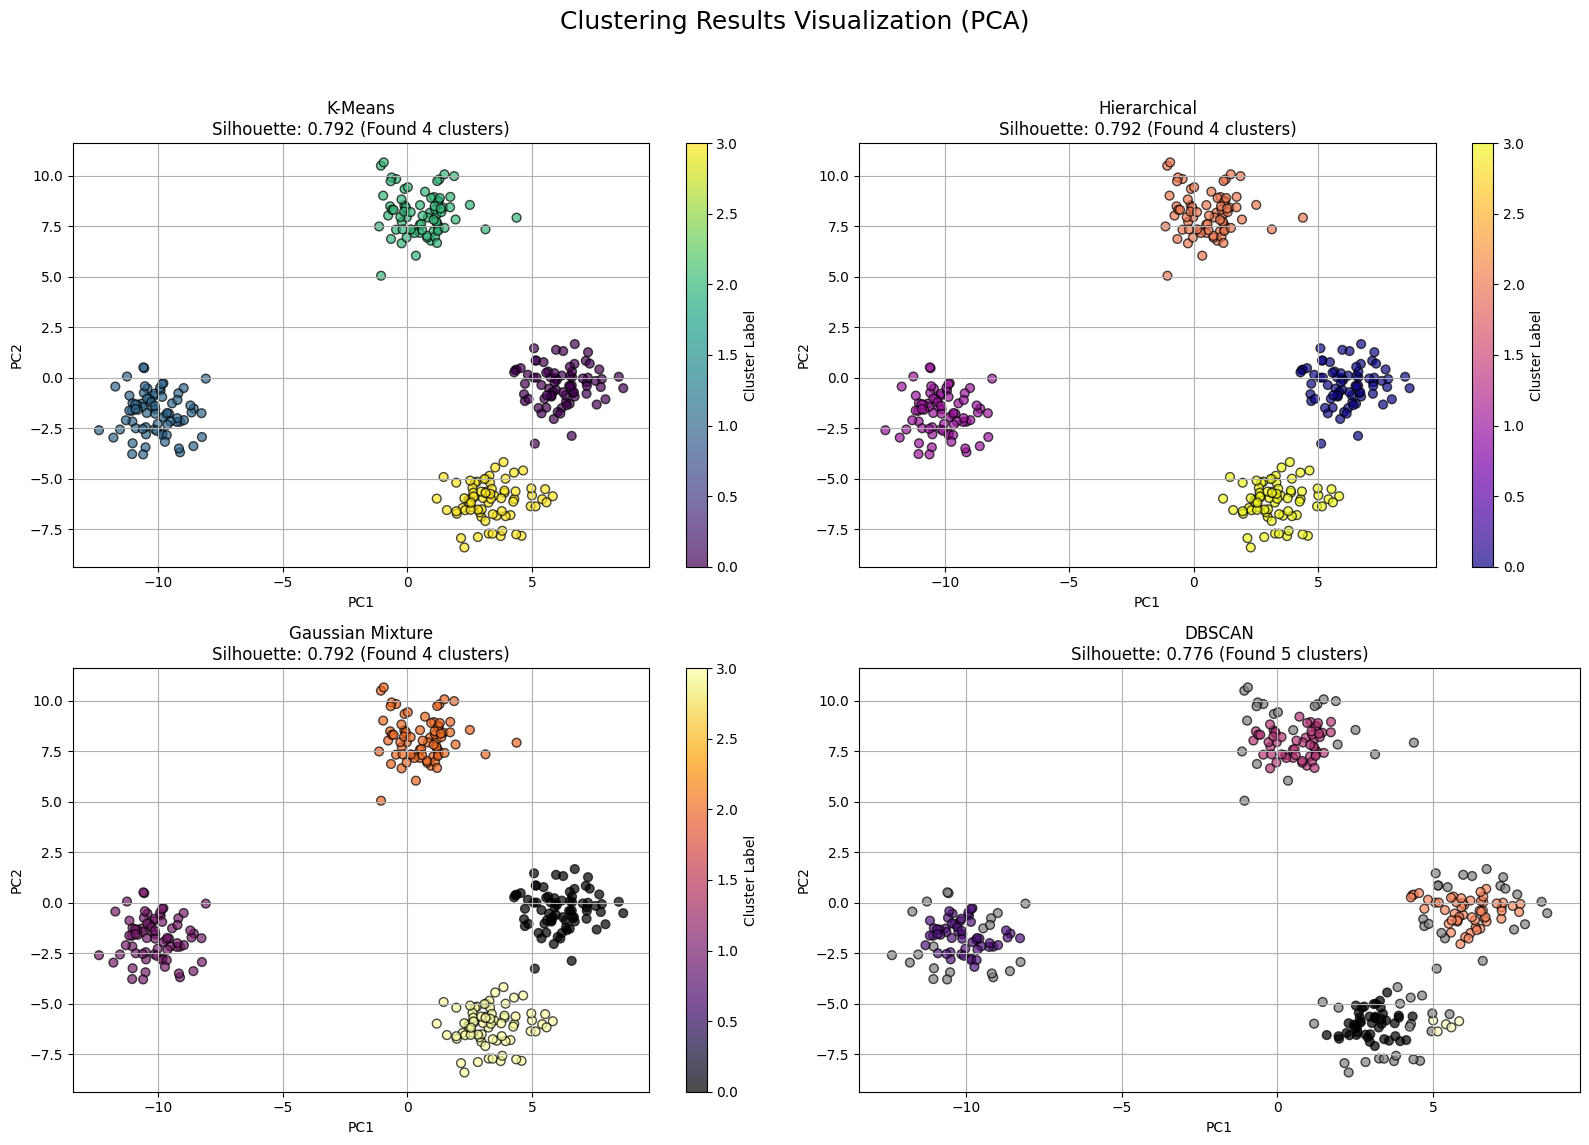

In [ ]:
# ipython-input-64-2350212499

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # Ensure imports are before function definition
import pandas as pd # Make sure pandas is imported if needed

# Define the visualize_clusters function first
def visualize_clusters(data, results):
    """
    Visualize clustering results using PCA (2D projection).
    Expects:
      - data: original data (numpy array or DataFrame)
      - results: dict of clustering outputs from perform_clustering()
    """
    print("\n" + "=" * 50)
    print("VISUALIZING CLUSTERING RESULTS")
    print("=" * 50)

    # Convert to numpy array if passed as DataFrame
    if hasattr(data, 'values'):
        data = data.values

    # Perform PCA
    print("Performing PCA for visualization...")
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)

    print(f"✓ PCA completed")
    print(f"  - PC1 explains {pca.explained_variance_ratio_[0]:.2%} of variance")
    print(f"  - PC2 explains {pca.explained_variance_ratio_[1]:.2%} of variance")
    print(f"  - Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

    # Setup plot
    # Determine the number of plots needed based on valid results
    valid_results = {name: res for name, res in results.items() if 'labels' in res and res['labels'] is not None}
    num_plots = len(valid_results)

    if num_plots == 0:
        print("No valid clustering results to visualize.")
        return

    # Calculate grid size (e.g., 2x2 for 4 plots, 2x3 for 5-6, etc.)
    nrows = int(np.ceil(num_plots / 2))
    ncols = 2 if num_plots > 1 else 1

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 8, nrows * 6)) # Adjust figure size based on grid
    # Ensure axes is always a 2D array for easy indexing
    if nrows == 1 and ncols == 1:
        axes = np.array([[axes]])
    elif nrows == 1 or ncols == 1:
        axes = axes.reshape(nrows, ncols)


    fig.suptitle('Clustering Results Visualization (PCA)', fontsize=18)

    color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'twilight'] # More color maps
    plot_count = 0

    # Use the valid_results dictionary
    for i, (name, result) in enumerate(valid_results.items()):

        row = plot_count // ncols
        col = plot_count % ncols

        labels = result['labels']
        cmap = color_maps[plot_count % len(color_maps)]

        # Handle DBSCAN noise (-1) - assign a distinct color
        unique_labels = np.unique(labels)
        if -1 in unique_labels:
             # Create a custom colormap: add grey for -1, then use the main cmap for others
             colors = [plt.cm.gray(0.5) if label == -1 else plt.cm.get_cmap(cmap)(label / max(1, unique_labels.max())) for label in unique_labels]
             cmap = plt.matplotlib.colors.ListedColormap(colors)
             # Ensure scatter 'c' corresponds to the mapped colors
             # Need to map actual labels to the new color index
             label_mapping = {label: i for i, label in enumerate(unique_labels)}
             mapped_labels = np.array([label_mapping[label] for label in labels])
             c_data = mapped_labels
        else:
             # Use default scatter coloring with the chosen colormap
             c_data = labels


        sc = axes[row, col].scatter(
            data_pca[:, 0], data_pca[:, 1],
            c=c_data, # Use mapped_labels if DBSCAN, otherwise original labels
            cmap=cmap,
            alpha=0.7,
            edgecolor='k',
            s=40
        )

        # Add a color bar if not DBSCAN with noise, or if custom colormap is used
        if -1 not in unique_labels:
             # Create a color bar for the standard case
             fig.colorbar(sc, ax=axes[row, col], label='Cluster Label')
        # If using custom colormap for DBSCAN, colorbar might need explicit label handling
        # For simplicity, omitting colorbar for DBSCAN with noise here or implementing a custom one if needed.


        # Title with metrics if available
        title = f"{name}"
        if 'silhouette_score' in result and not np.isnan(result['silhouette_score']):
            title += f"\nSilhouette: {result['silhouette_score']:.3f}"
        if 'n_clusters_found' in result:
             title += f" (Found {result['n_clusters_found']} clusters)" # Add number of clusters found

        axes[row, col].set_title(title)
        axes[row, col].set_xlabel("PC1")
        axes[row, col].set_ylabel("PC2")
        axes[row, col].grid(True)
        plot_count += 1

    # Hide any unused subplots
    for j in range(plot_count, nrows * ncols):
        fig.delaxes(axes[j // ncols, j % ncols])


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# --- Now call the function AFTER its definition ---
# Example usage after perform_clustering
# Make sure clustering_data_scaled and clustering_results are available from previous cells
clustering_results = perform_clustering(clustering_data_scaled.values, final_k) # This line is still needed to get results if not already run
visualize_clusters(clustering_data_scaled, clustering_results)

Creating Business Insight Report. Which cluster and segment can create more business value.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Feature scaling
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(df_processed)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_data_scaled)


In [ ]:
class BusinessInsightsAnalyzer:
    def __init__(self, original_data, clustered_data, cluster_labels, algorithm_name='K-Means'):
        self.original_data = original_data.copy()
        self.clustered_data = clustered_data.copy()
        self.cluster_labels = cluster_labels
        self.algorithm_name = algorithm_name

        # Attach cluster labels if length matches
        if len(self.original_data) == len(cluster_labels):
            self.original_data['Cluster'] = cluster_labels
        else:
            print("Length mismatch between original data and cluster labels.")

    def create_segment_visualization(self):
        print("\n" + "=" * 60)
        print("CREATING BUSINESS INSIGHT VISUALIZATIONS")
        print("=" * 60)

        if 'Cluster' not in self.original_data.columns:
            print("Error: 'Cluster' column not found in original_data.")
            return

        cluster_sizes = self.original_data['Cluster'].value_counts().sort_index()
        if len(cluster_sizes) == 0:
            print("No clusters found.")
            return

        colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_sizes)))

        fig = plt.figure(figsize=(20, 15))
        plt.suptitle(f'{self.algorithm_name} Customer Segmentation Business Insights', fontsize=20)

        # Segment Size
        plt.subplot(2, 2, 1)
        sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette=colors)
        plt.title('Segment Size Distribution')
        plt.xlabel('Cluster')
        plt.ylabel('Customers')

        # Avg Spending
        if 'Total_Spending' in self.original_data.columns:
            avg_spending = self.original_data.groupby('Cluster')['Total_Spending'].mean()
            plt.subplot(2, 2, 2)
            sns.barplot(x=avg_spending.index, y=avg_spending.values, palette=colors)
            plt.title('Average Spending per Segment')
            plt.xlabel('Cluster')
            plt.ylabel('Avg Spending ($)')

        # Recency
        if 'Recency' in self.original_data.columns:
            avg_recency = self.original_data.groupby('Cluster')['Recency'].mean()
            plt.subplot(2, 2, 3)
            sns.barplot(x=avg_recency.index, y=avg_recency.values, palette=colors)
            plt.title('Average Recency per Segment')
            plt.xlabel('Cluster')
            plt.ylabel('Avg Days Since Last Purchase')

        # Income Boxplot
        if 'Income' in self.original_data.columns:
            plt.subplot(2, 2, 4)
            sns.boxplot(x='Cluster', y='Income', data=self.original_data, palette=colors)
            plt.title('Income Distribution by Segment')
            plt.xlabel('Cluster')
            plt.ylabel('Income ($)')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()



CREATING BUSINESS INSIGHT VISUALIZATIONS


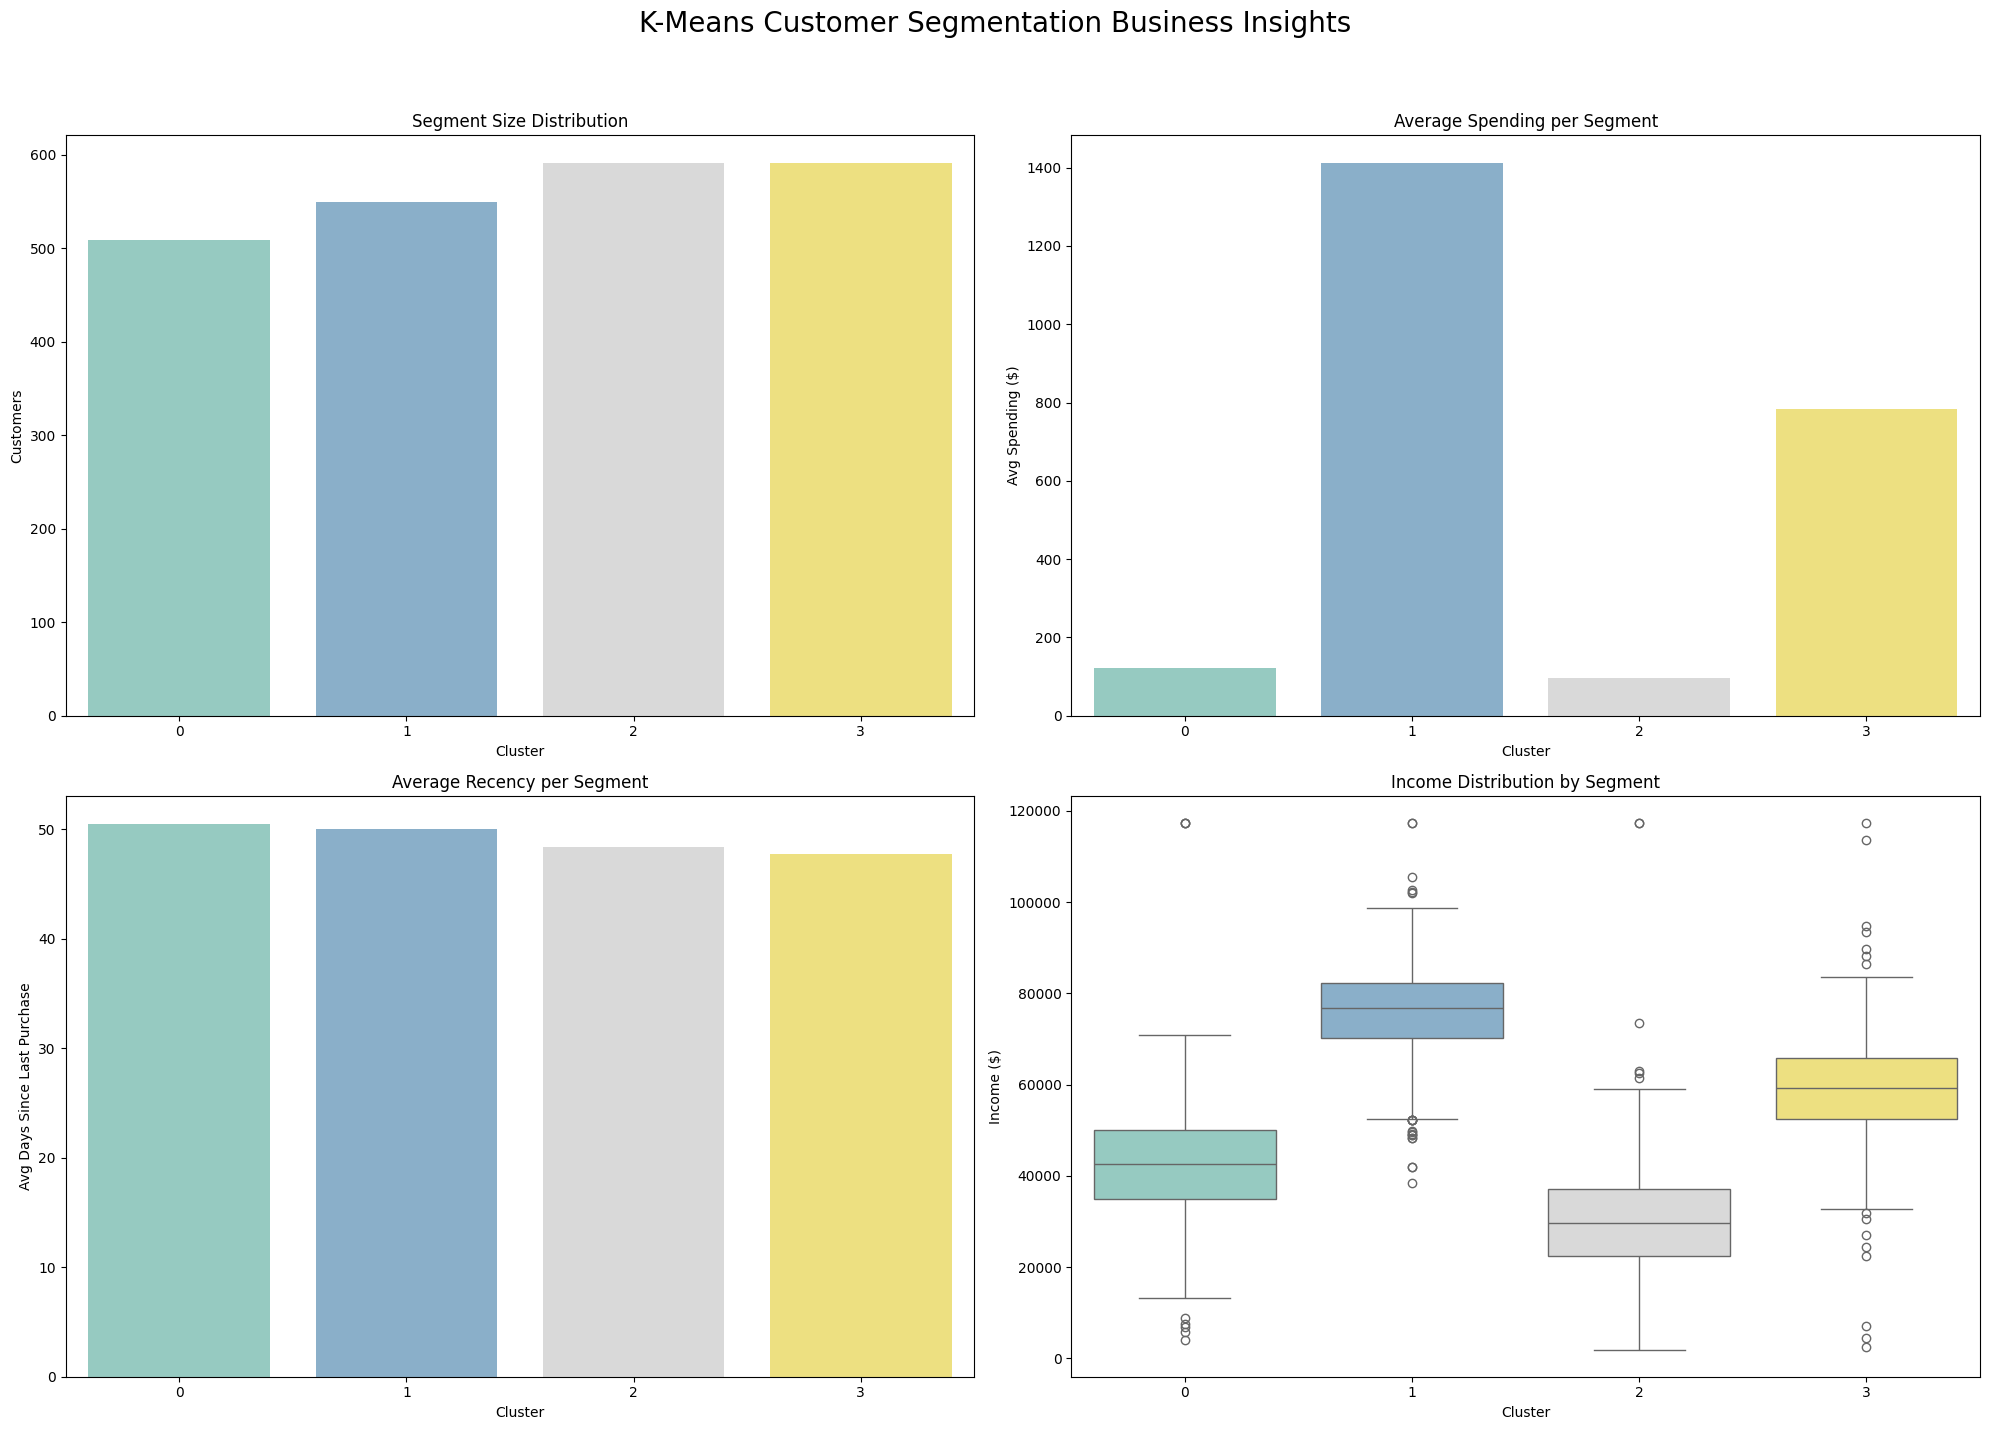

In [ ]:
analyzer = BusinessInsightsAnalyzer(
    original_data=df_processed,
    clustered_data=clustering_data_scaled,
    cluster_labels=cluster_labels,
    algorithm_name='K-Means'
)

analyzer.create_segment_visualization()
